# ASSIGNMENT 01

Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [47]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#loading the dataset

df = pd.read_csv("uber.csv")

In [49]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [51]:
df.shape

(200000, 9)

# 1.Pre-process the dataset.

In [52]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [53]:
#dropping rows with missing values

df.dropna(inplace = True)

In [54]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [55]:
#dropping unwanted columns

df.drop(labels='Unnamed: 0',axis=1,inplace=True)
df.drop(labels='key',axis=1,inplace=True)

In [56]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [57]:
#converting datatype of column "pickup_datetime" from object to DateTime
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [58]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [59]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


# 2. Identify outliers.

OUTLIER: An object that deviates significantly from the rest of the objects.

<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

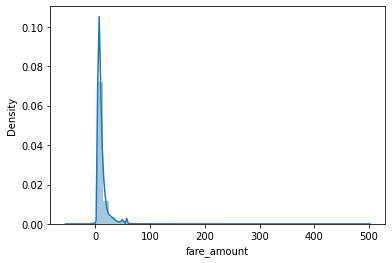

In [60]:
# data visualization
# plotting distribution plot

import warnings
warnings.filterwarnings("ignore")
sns.distplot(df['fare_amount'])

<AxesSubplot:xlabel='pickup_latitude', ylabel='Density'>

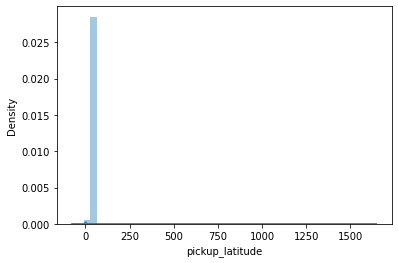

In [61]:
sns.distplot(df['pickup_latitude'])

<AxesSubplot:xlabel='pickup_longitude', ylabel='Density'>

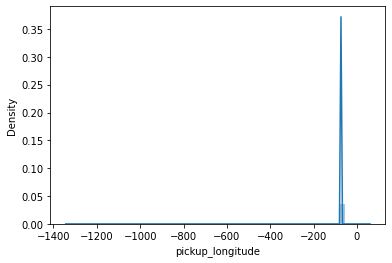

In [62]:
sns.distplot(df['pickup_longitude'])

<AxesSubplot:xlabel='dropoff_longitude', ylabel='Density'>

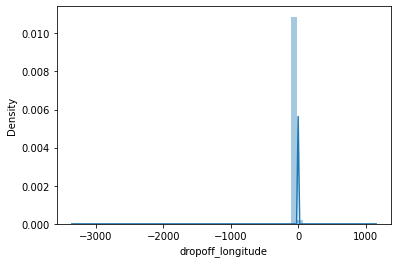

In [63]:
sns.distplot(df['dropoff_longitude'])

<AxesSubplot:xlabel='dropoff_latitude', ylabel='Density'>

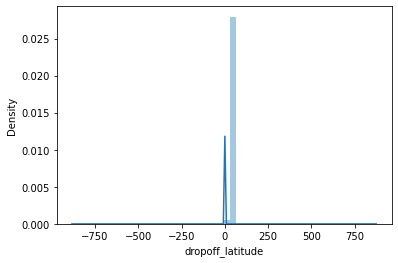

In [64]:
sns.distplot(df['dropoff_latitude'])

In [65]:
#creating a function to identify outliers

def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [66]:
#getting outlier details for column "fair_amount" using the above function

outliers = find_outliers_IQR(df["fare_amount"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 17166
max outlier value: 499.0
min outlier value: -52.0


6         24.50
30        25.70
34        39.50
39        29.00
48        56.80
          ...  
199976    49.70
199977    43.50
199982    57.33
199985    24.00
199997    30.90
Name: fare_amount, Length: 17166, dtype: float64

In [67]:
#you can also pass two columns as argument to the function (here "passenger_count" and "fair_amount")

outliers = find_outliers_IQR(df[["passenger_count","fare_amount"]])
outliers

,passenger_count,fare_amount
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,5.0,NaN
...,...,...
199995,NaN,NaN
199996,NaN,NaN
199997,NaN,30.9
199998,NaN,NaN


In [68]:
#upper and lower limit which can be used for capping of outliers

upper_limit = df['fare_amount'].mean() + 3*df['fare_amount'].std()
print(upper_limit)
lower_limit = df['fare_amount'].mean() - 3*df['fare_amount'].std()
print(lower_limit)

41.06517154773827
-18.345388448822774


# 3. Check the correlation.

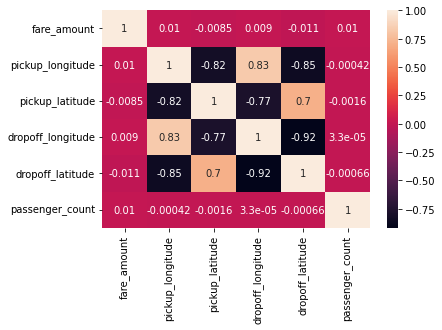

In [69]:
#creating a correlation matrix

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [70]:
#splitting column "pickup_datetime" into 5 columns: "day", "hour", "month", "year", "weekday"
#for a simplified view

import calendar
df['day']=df['pickup_datetime'].apply(lambda x:x.day)
df['hour']=df['pickup_datetime'].apply(lambda x:x.hour)
df['month']=df['pickup_datetime'].apply(lambda x:x.month)
df['year']=df['pickup_datetime'].apply(lambda x:x.year)
df['weekday']=df['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
df.drop(['pickup_datetime'],axis=1,inplace=True)


In [71]:
#label encoding (categorical to numerical)

df.weekday = df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [72]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,4
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,5
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,5
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,4


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   day                199999 non-null  int64  
 7   hour               199999 non-null  int64  
 8   month              199999 non-null  int64  
 9   year               199999 non-null  int64  
 10  weekday            199999 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 18.3 MB


In [74]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split

In [75]:
#independent variables (x)

x=df.drop("fare_amount", axis=1)
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,4
1,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,5
2,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,1
3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,5
4,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,4
...,...,...,...,...,...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1,28,10,10,2012,0
199996,-73.984722,40.736837,-74.006672,40.739620,1,14,1,3,2014,5
199997,-73.986017,40.756487,-73.858957,40.692588,2,29,0,6,2009,1
199998,-73.997124,40.725452,-73.983215,40.695415,1,20,14,5,2015,3


In [76]:
#dependent variable (y)

y=df["fare_amount"]

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [78]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
80768,-73.983703,40.725752,-73.972000,40.793888,1,22,1,2,2009,0
111783,-73.961175,40.760667,-73.976507,40.747570,1,7,14,3,2009,6
24615,-73.947784,40.783111,-73.955408,40.779405,1,17,11,3,2011,4
46932,-73.980596,40.733797,-73.972092,40.747297,1,15,7,1,2010,5
86655,-73.963035,40.758380,-73.987877,40.745477,2,28,19,6,2014,6


In [79]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
13588,-73.982810,40.771687,-73.977065,40.763200,1,25,22,6,2013,2
29803,-73.991985,40.725763,-73.995762,40.759797,1,20,20,2,2011,0
138265,-73.985730,40.767882,-73.998525,40.760667,1,20,14,10,2013,0
82856,-73.973200,40.748100,-73.973500,40.748200,1,17,18,11,2011,4
162747,-74.007432,40.716580,-73.986858,40.761328,1,10,22,2,2009,2


In [80]:
y_train.head()

80768     19.7
111783     7.7
24615      4.5
46932      4.5
86655     10.0
Name: fare_amount, dtype: float64

In [81]:
y_test.head()

13588      5.5
29803     11.3
138265     6.5
82856     18.1
162747    11.3
Name: fare_amount, dtype: float64

In [82]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(159999, 10)
(40000, 10)
(40000,)
(159999,)


# 4. Implement linear regression and random forest regression models.
# 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.


In [83]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [84]:
predictedvalues = lrmodel.predict(x_test)

In [85]:
#Calculating the value of RMSE for Linear Regression

from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 9.806687708433811


In [86]:
#Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [87]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [88]:
#Calculating the value of RMSE for Random Forest Regression

rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

RMSE value for Random forest regression is  4.756011315216782


# Predict the price of the Uber ride

In [89]:
test = pd.read_csv("https://raw.githubusercontent.com/piyushpandey758/Uber-Fare-Prediction/master/testt.csv")

In [90]:
test.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,37338,31401407,2011-02-10 19:06:00.000000169,2011-02-10 19:06:00 UTC,-73.951662,40.790710,-73.947570,40.756220,1
1,1,160901,33158465,2011-06-23 09:24:00.000000157,2011-06-23 09:24:00 UTC,-73.951007,40.771508,-73.974075,40.763553,1
2,2,40428,10638355,2012-07-14 10:37:00.000000149,2012-07-14 10:37:00 UTC,-73.996473,40.747930,-73.990298,40.756152,6
3,3,63353,3836845,2014-10-19 22:27:05.0000002,2014-10-19 22:27:05 UTC,-73.997934,40.716890,-73.952617,40.727149,1
4,4,165491,27114503,2015-05-25 22:54:43.0000001,2015-05-25 22:54:43 UTC,-73.952583,40.714039,-73.906128,40.711281,1


In [91]:
test.drop(test[['Unnamed: 0.2','Unnamed: 0','Unnamed: 0.1','key']],axis=1,inplace=True)

In [92]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [93]:
#converting datatype of column "pickup_datetime" from object to DateTime

test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"])

In [94]:
#splitting column "pickup_datetime" into 5 columns: "day", "hour", "month", "year", "weekday"
#for a simplified view
#label encoding weekdays

test['day']=test['pickup_datetime'].apply(lambda x:x.day)
test['hour']=test['pickup_datetime'].apply(lambda x:x.hour)
test['month']=test['pickup_datetime'].apply(lambda x:x.month)
test['year']=test['pickup_datetime'].apply(lambda x:x.year)
test['weekday']=test['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

test.weekday = test.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

test.drop(['pickup_datetime'], axis = 1, inplace = True)

test.head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,-73.951662,40.790710,-73.947570,40.756220,1,10,19,2,2011,4
1,-73.951007,40.771508,-73.974075,40.763553,1,23,9,6,2011,4
2,-73.996473,40.747930,-73.990298,40.756152,6,14,10,7,2012,6
3,-73.997934,40.716890,-73.952617,40.727149,1,19,22,10,2014,0
4,-73.952583,40.714039,-73.906128,40.711281,1,25,22,5,2015,1


In [95]:
#Prediction!

rfrmodel_pred= rfrmodel.predict(test)

In [96]:
df_pred = pd.DataFrame(rfrmodel_pred)
df_pred

,0
0,10.985
1,8.816
2,5.139
3,12.954
4,11.693
...,...
49995,6.610
49996,25.268
49997,6.375
49998,7.751


In [97]:
#to_csv() function exports the DataFrame to CSV format

df_pred.to_csv('pred.csv')